In [ ]:
#Installing FBProphet Time Series Model
!pip install fbprophet

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL (1).csv


In [ ]:
#df.reset_index(inplace=True)
df = pd.read_csv('AAPL.csv')

In [ ]:
df.shape

(1258, 7)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
#Remove the date column
df.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'],1,inplace = True)

In [ ]:
df.head()

,Date,Close
0,2015-01-02,109.330002
1,2015-01-05,106.250000
2,2015-01-06,106.260002
3,2015-01-07,107.750000
4,2015-01-08,111.889999


In [ ]:
df.tail()

,Date,Close
1253,2019-12-24,284.269989
1254,2019-12-26,289.910004
1255,2019-12-27,289.799988
1256,2019-12-30,291.519989
1257,2019-12-31,293.649994


In [ ]:
df.columns

Index(['Date', 'Close'], dtype='object')

In [ ]:
df.describe()

,Close
count,1258.000000
mean,154.476566
std,44.119589
min,90.339996
25%,115.504999
50%,150.555001
75%,186.002502
max,293.649994


Text(0, 0.5, 'Close Price')

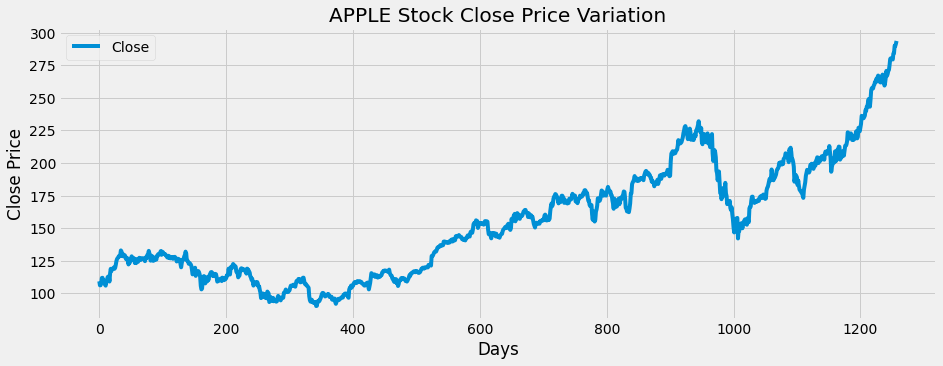

In [ ]:
df.plot(kind='line', figsize = (14,5))
plt.title('APPLE Stock Close Price Variation')
plt.xlabel('Days')
plt.ylabel('Close Price')

In [ ]:
# Time Series Forecasting

import fbprophet

In [ ]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [ ]:
# Initialize Model

from fbprophet import  Prophet
my_model= Prophet()

In [ ]:
my_model.add_seasonality(name="monthly", period=31, fourier_order=5)

In [ ]:
df

,Date,Close
0,2015-01-02,109.330002
1,2015-01-05,106.250000
2,2015-01-06,106.260002
3,2015-01-07,107.750000
4,2015-01-08,111.889999
...,...,...
1253,2019-12-24,284.269989
1254,2019-12-26,289.910004
1255,2019-12-27,289.799988
1256,2019-12-30,291.519989


In [ ]:
df.tail(252)


,Date,Close
1006,2019-01-02,157.919998
1007,2019-01-03,142.190002
1008,2019-01-04,148.259995
1009,2019-01-07,147.929993
1010,2019-01-08,150.750000
...,...,...
1253,2019-12-24,284.269989
1254,2019-12-26,289.910004
1255,2019-12-27,289.799988
1256,2019-12-30,291.519989


In [ ]:
df.shape

(1258, 2)

In [ ]:
df_data = df
df_data.rename(columns = {"Date":"ds", "Close":"y"}, inplace = True)

In [ ]:
train = df_data[:1006]
test = df_data[1006:]

In [ ]:
train.head()

,ds,y
0,2015-01-02,109.330002
1,2015-01-05,106.250000
2,2015-01-06,106.260002
3,2015-01-07,107.750000
4,2015-01-08,111.889999


In [ ]:
train.tail()

,ds,y
1001,2018-12-24,146.830002
1002,2018-12-26,157.169998
1003,2018-12-27,156.149994
1004,2018-12-28,156.229996
1005,2018-12-31,157.740005


In [ ]:
test

,ds,y
1006,2019-01-02,157.919998
1007,2019-01-03,142.190002
1008,2019-01-04,148.259995
1009,2019-01-07,147.929993
1010,2019-01-08,150.750000
...,...,...
1253,2019-12-24,284.269989
1254,2019-12-26,289.910004
1255,2019-12-27,289.799988
1256,2019-12-30,291.519989


In [ ]:
# Fit Model
my_model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Future Dates
future_dates = my_model.make_future_dataframe(periods=365, freq = "D", include_history= True)

In [ ]:
future_dates

,ds
0,2015-01-02
1,2015-01-05
2,2015-01-06
3,2015-01-07
4,2015-01-08
...,...
1366,2019-12-27
1367,2019-12-28
1368,2019-12-29
1369,2019-12-30


In [ ]:
# Prediction
prediction = my_model.predict(future_dates)

Text(0.5, 1.0, 'Future Predicted Close Price for 2019')

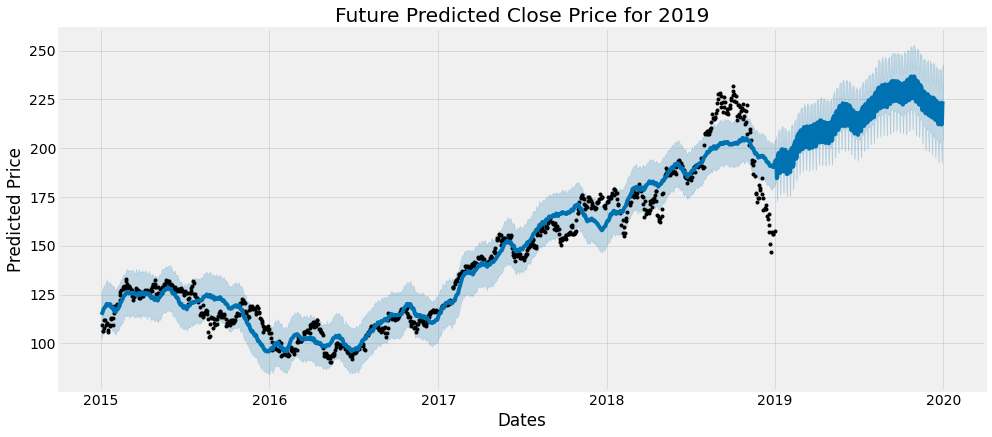

In [ ]:
# Plot Prediction
my_model.plot(prediction, xlabel="Dates", ylabel="Predicted Price", figsize=(14,6), )
plt.title("Future Predicted Close Price for 2019")

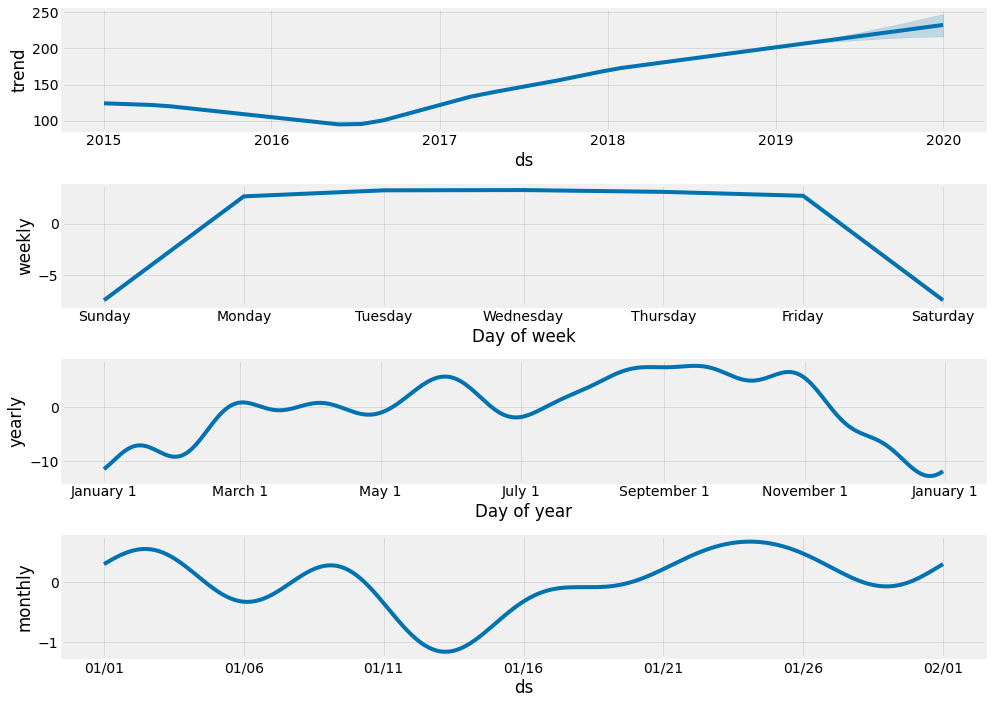

In [ ]:
my_model.plot_components(prediction, figsize=(14,10))
plt.show()

In [ ]:
prediction.tail(252)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1119,2019-04-24,211.183913,200.718259,224.915694,208.912040,213.724724,1.659813,1.659813,1.659813,-0.255582,-0.255582,-0.255582,3.258904,3.258904,3.258904,-1.343509,-1.343509,-1.343509,0.0,0.0,0.0,212.843726
1120,2019-04-25,211.269141,201.830143,224.341169,208.968790,213.848676,1.715785,1.715785,1.715785,0.020656,0.020656,0.020656,3.085314,3.085314,3.085314,-1.390185,-1.390185,-1.390185,0.0,0.0,0.0,212.984926
1121,2019-04-26,211.354369,199.963961,224.194714,209.020878,213.980752,1.547250,1.547250,1.547250,0.258830,0.258830,0.258830,2.700731,2.700731,2.700731,-1.412311,-1.412311,-1.412311,0.0,0.0,0.0,212.901619
1122,2019-04-27,211.439597,191.439105,214.970694,209.064484,214.094824,-8.660749,-8.660749,-8.660749,0.210579,0.210579,0.210579,-7.462721,-7.462721,-7.462721,-1.408608,-1.408608,-1.408608,0.0,0.0,0.0,202.778847
1123,2019-04-28,211.524824,191.835929,213.969322,209.115292,214.200972,-9.016610,-9.016610,-9.016610,-0.175731,-0.175731,-0.175731,-7.462721,-7.462721,-7.462721,-1.378158,-1.378158,-1.378158,0.0,0.0,0.0,202.508214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,2019-12-27,232.235181,202.888848,239.202979,216.694340,246.934110,-10.256478,-10.256478,-10.256478,-0.316547,-0.316547,-0.316547,2.700731,2.700731,2.700731,-12.640663,-12.640663,-12.640663,0.0,0.0,0.0,221.978702
1367,2019-12-28,232.320408,192.463882,230.461067,216.717268,247.040520,-20.263080,-20.263080,-20.263080,-0.255582,-0.255582,-0.255582,-7.462721,-7.462721,-7.462721,-12.544778,-12.544778,-12.544778,0.0,0.0,0.0,212.057328
1368,2019-12-29,232.405636,193.715769,230.575475,216.746575,247.146929,-19.837013,-19.837013,-19.837013,0.020656,0.020656,0.020656,-7.462721,-7.462721,-7.462721,-12.394948,-12.394948,-12.394948,0.0,0.0,0.0,212.568623
1369,2019-12-30,232.490864,203.833751,241.714378,216.762853,247.253339,-9.289015,-9.289015,-9.289015,0.258830,0.258830,0.258830,2.646275,2.646275,2.646275,-12.194120,-12.194120,-12.194120,0.0,0.0,0.0,223.201849


In [ ]:
test

,ds,y
1006,2019-01-02,157.919998
1007,2019-01-03,142.190002
1008,2019-01-04,148.259995
1009,2019-01-07,147.929993
1010,2019-01-08,150.750000
...,...,...
1253,2019-12-24,284.269989
1254,2019-12-26,289.910004
1255,2019-12-27,289.799988
1256,2019-12-30,291.519989


In [ ]:
#separating the predicted value and date
predicted_data= prediction.tail(252).filter(['ds','yhat'], axis=1)
predicted_data = predicted_data.rename(columns={'ds': 'Date', 'yhat':'Predicted Close Price'})

x = np.array(df.drop(['ds'], 1))
predicted_data['Actual Close Price'] = x[1006:]

predicted_data

,Date,Predicted Close Price,Actual Close Price
1119,2019-04-24,212.843726,157.919998
1120,2019-04-25,212.984926,142.190002
1121,2019-04-26,212.901619,148.259995
1122,2019-04-27,202.778847,147.929993
1123,2019-04-28,202.508214,150.750000
...,...,...,...
1366,2019-12-27,221.978702,284.269989
1367,2019-12-28,212.057328,289.910004
1368,2019-12-29,212.568623,289.799988
1369,2019-12-30,223.201849,291.519989


In [ ]:
predicted_data.shape

(252, 3)

In [ ]:
predicted_analysis = predicted_data.set_index("Date")

In [ ]:
predicted_analysis.shape

(252, 2)

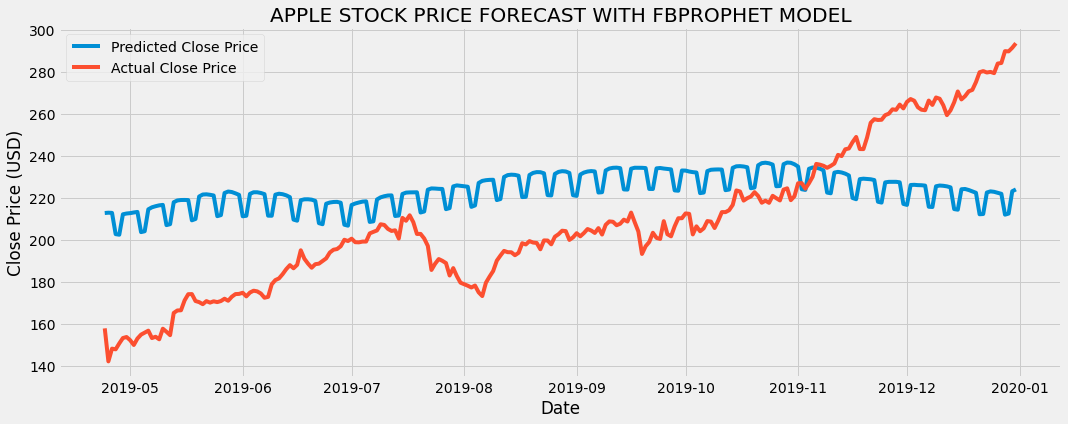

In [ ]:
plt.figure(figsize = (16,6))
for c in predicted_analysis.columns.values:
  plt.plot(predicted_analysis[c], label = c)

plt.title('APPLE STOCK PRICE FORECAST WITH FBPROPHET MODEL')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend(predicted_analysis.columns.values, loc = 'upper left')
plt.show()

In [ ]:
x = predicted_analysis['Actual Close Price']
y = predicted_analysis['Predicted Close Price']

mse = mean_squared_error(x, y)
rmse = math.sqrt(mse) 
acc=100-rmse

print("The MEAN SQUARE ERROR of the Model is: ",mse)
print("The ROOT MEAN SQUARE ERROR of the Model is: ",rmse)
print("The ACCURACY of the Model is: ",acc,"%")

The MEAN SQUARE ERROR of the Model is:  1317.5123153542158
The ROOT MEAN SQUARE ERROR of the Model is:  36.29755247057597
The ACCURACY of the Model is:  63.70244752942403 %
